## Find two datasets and describe their statistics

Find two datasets that have:
1. the same range and standard deviation, but different means
2. the same mean and range, but different standard deviations
3. the same mean and standard deviation, but different ranges

In [70]:
from statistics import mean, stdev 
def range_(lst):
    return lst[-1] - lst[0]
def meanOf(list1, list2):
    mean1 = round(mean(list1), 1)
    mean2 = round(mean(list2), 1)
    print("Mean:","\t", mean1, "\t", mean2, "\t", mean(list1) == mean(list2))
def rangeOf(list1, list2):
    range1 = round(range_(list1), 1)
    range2 = round(range_(list2), 1)
    print("Range:","\t", range1, "\t", range2, "\t", range_(list1) == range_(list2))
def stdevOf(list1, list2):
    stdev1 = round(stdev(list1), 1)
    stdev2 = round(stdev(list2), 1)
    print("SD:","\t", stdev1, "\t", stdev2, "\t", stdev(list1) == stdev(list2))
def check(list1, list2):
    print(" \t", "List 1 ", "List 2 ", "Equal?")
    meanOf(list1, list2)
    rangeOf(list1, list2)
    stdevOf(list1, list2)
    print("\n")
    
check([1,2,3], [4,5,6]) #Two data sets with the same range and standard deviation, but different means
check([4,6,8], [4,5,6,7,8]) #Two data sets with the same mean and range, but different standard deviations.
check([-1,0,1],[-2,0,2]) #Two data sets with the same mean and standard deviation, but different ranges.

 	 List 1  List 2  Equal?
Mean: 	 2 	 5 	 False
Range: 	 2 	 2 	 True
SD: 	 1.0 	 1.0 	 True


 	 List 1  List 2  Equal?
Mean: 	 6 	 6 	 True
Range: 	 4 	 4 	 True
SD: 	 2.0 	 1.6 	 False


 	 List 1  List 2  Equal?
Mean: 	 0 	 0 	 True
Range: 	 2 	 4 	 False
SD: 	 1.0 	 2.0 	 False




### Calculate winning probability in racquet
In racquetball, a player continues to serve as long as she is winning; a point is scored only when a player is serving and wins the volley. This means that a point is not necessarily awarded on each volley. 
<br> 
For example, if you were serving, and won the volley, you would receive one point and continue to serve. But if you were serving, and lost the volley, the serve would be handed to your opponent next and no point would be awarded. The **first player to win 21 points wins the game**. 
<br>
Assume that **you serve first and have probability 0.6 of winning** a volley when you serve and **probability 0.5 when your opponent serves**. Estimate, by simulation, the probability that you will win a game

In [71]:
from random import random

your_winp, other_winp, n_games = 0.6, 0.5, 10000
pts_to_win = 21

def game_over(a,b):
    return a >= pts_to_win or b >= pts_to_win

def game_sim(probA, probB):
    serving = "A"
    scoreA = scoreB = n_games = 0
    while not game_over(scoreA, scoreB):
        if serving == "A":
            if random() < probA:
                scoreA = scoreA + 1
            else:
                serving = "B"
        else:
            if random() < probB:
                scoreB = scoreB + 1
            else:
                serving = "A"                
        n_games += 1
    return scoreA, scoreB

def n_games_sim(n_games, probA, probB):
    # Simulates n games of racquetball between players whose abilities are represented by the probability of winning a serve.
    # Returns number of wins for A and B
    winsA = winsB = 0
    for i in range(n_games):
        scoreA, scoreB = game_sim(probA, probB)
        if scoreA > scoreB:
            winsA = winsA + 1
        else:
            winsB = winsB + 1
    return round(winsA/n_games, 2), round(winsB/n_games, 2)

n_games_sim(n_games, your_winp, other_winp)

(0.83, 0.17)

In [72]:
from scipy import stats
from math import factorial

#Geometric Distribution
gp = 0.3
gn = 2
geom_dist = round(stats.geom.pmf(gn,gp),5)
geom_dist_formula = round((1 - gp)**(gn-1)*gp,5)
print("Probability of first success on the",gn,"th trial:",geom_dist)
print("Does this command match the formula?:", geom_dist == geom_dist_formula, "\n")

#Binomial Distribution
bp = 0.1
bn = 100
bk = 80
binom_dist = round(stats.binom.pmf(bk,bn,bp),5)
combination = factorial(bn)/(factorial(bk)*factorial(bn - bk))
multiply_rule = (bp**bk) * ((1-bp)**(bn-bk))
binom_dist_formula = round(combination * multiply_rule,5)
print("Probability of", bk,"successes in",bn,"trials:", binom_dist)
print("Does this command match the formula?:", binom_dist == binom_dist_formula)

Probability of first success on the 2 th trial: 0.21
Does this command match the formula?: True 

Probability of 80 successes in 100 trials: 0.0
Does this command match the formula?: True


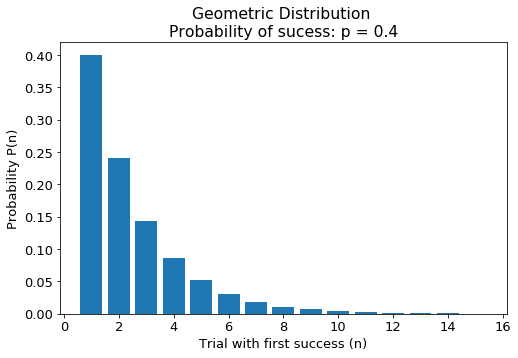

mean = 2.5
SD = 1.936


In [73]:
from scipy import stats
import matplotlib.pyplot as plt

p = 0.4 # probability of success
n = list(range(1,16,1)) # trial with first success

geometric_distribution = stats.geom.pmf(n, p)

plt.bar(n, geometric_distribution)
plt.title('Geometric Distribution \nProbability of sucess: p = '+str(p))
plt.xlabel('Trial with first success (n)')
plt.ylabel('Probability P(n)')
plt.show()

mean = round(1/p,3)
stdev = round(((1-p)/(p**2))**0.5,3)
print("mean =", mean) 
print("SD =", stdev) 

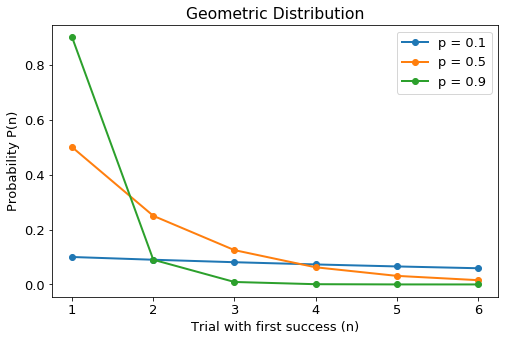

In [74]:
n = list(range(1,7))

for p in [0.1,0.5,0.9]:
    p = round(p,2)
    distribution = stats.geom.pmf(n, p)
    plt.plot(n, distribution, linewidth=2, marker='o', label='p = {prob}'.format(prob=p))

plt.title('Geometric Distribution')
plt.legend(loc='best')
plt.xlabel('Trial with first success (n)')
plt.ylabel('Probability P(n)')
plt.show()

## Geometric Distribution Problem
Suppose that you decided to ignore the COVID-19 protocols and go out bar hopping without any masks or hand-washing. Given the high level of contagiousness, it is estimated that there's a 31.5% chance of catching the disease upon visiting a bar. Answer the following questions and use Python to assist with the calculations.

What is the probability that your first infection will come upon visiting the third bar?

On average, how many bars would you expect it to take to get your first infection?

Is the number of bars that you should expect it to take for the first infection the same as the most likely bar on which the first infection occurs?

## Binomal Distribution Problem
Suppose that Minerva's yield rate is 70 percent, meaning that on average, 70% of admitted students choose to accept the offer to attend Minerva. Further, suppose that you are meeting with a random selection of 16 recently admitted students

In [77]:
p = 0.7
n = 16

What is the probability that between 14 and 16 (inclusive) of the students you are meeting will accept Minerva's offer?

0.099


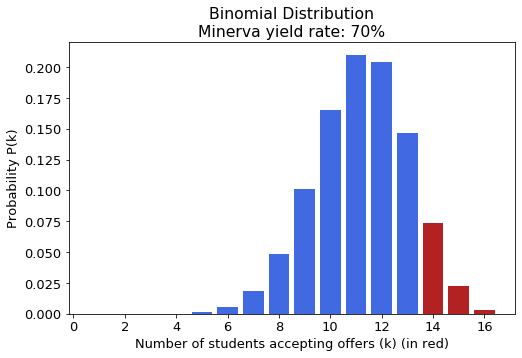

In [81]:
trial_list = list(range(1, n+1))
exclusive_range = list(range(14, 16+1))
prob = 0
colors = []
default_clr, highlight_clr = "royalblue","firebrick"

for k in exclusive_range:
    prob += stats.binom.pmf(k, n, p)
print(round(prob, 3))

for i in trial_list:
    if trial_list[i-1] in exclusive_range:
        colors.append(highlight_clr)
    else: 
        colors.append(default_clr)
        
distribution = stats.binom.pmf(trial_list, n, p)
plt.bar(trial_list, distribution, linewidth=2, label='n = {n}'.format(n=n), color = colors)

plt.title("Binomial Distribution\nMinerva yield rate: " + str(int(p*100)) + "%")
plt.xlabel("Number of students accepting offers (k) (in red)")
plt.ylabel("Probability P(k)")
plt.show()

What is the probability that fewer than 13 of them will accept Minerva's offer?

In [54]:
k = 13
dist = round(stats.binom.cdf(k - 1, n, p),3)
mean = round(stats.binom.mean(n, p),3) #mean = np
stdev = round(stats.binom.std(n, p), 3) 
print("Probability:", dist, "\nMean:", mean, "\nSD:", stdev)

Probability: 0.754 
Mean: 11.2 
SD: 1.833


In this sample of 16, how many students do you expect to accept the offer?

In [59]:
expectation = int(n*p) #equal to mean
print(expectation, "students")

11 students
